<a href="https://colab.research.google.com/github/guptapawan227/Capstone_AIML/blob/Bragadeesh/Capstone_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting Google Drive

In [310]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Importing Libraries

In [311]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import re 
from dateutil import parser
%matplotlib inline

Reading the data from excel 

In [312]:
data=pd.read_excel('/content/drive/MyDrive/Capstone/input_data.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


Exploratory Data Analysis

In [313]:
data.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [314]:
assignment_group_count=data['Assignment group'].value_counts()
assignment_group_count.describe()

count      74.000000
mean      114.864865
std       465.747516
min         1.000000
25%         5.250000
50%        26.000000
75%        84.000000
max      3976.000000
Name: Assignment group, dtype: float64

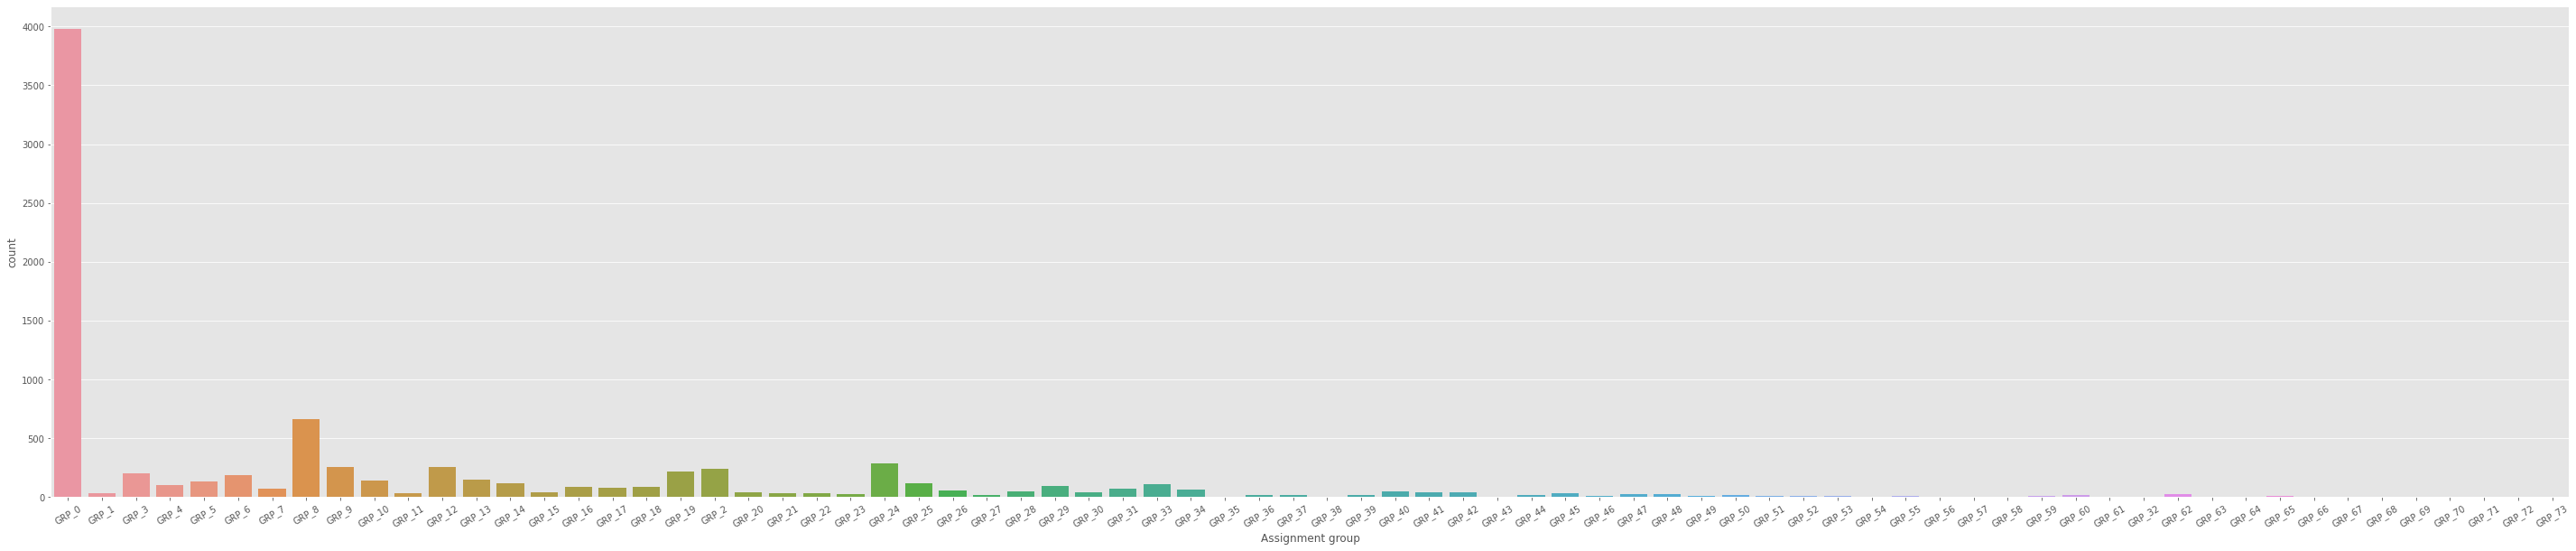

In [315]:

plt.subplots(figsize=(50,10))
ax=sns.countplot(x='Assignment group', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.tight_layout
plt.show()


Find groups which are having a count less than 10 and assigning them to a new group

In [316]:
COUNT = 10
groups = data.groupby(["Assignment group"])
low_count_group=[]
for group in data["Assignment group"].unique():
  if(groups.get_group(group).shape[0] < COUNT):
    low_count_group.append(group)
print(f"Following are the groups with a count lesser than {COUNT}:\n{low_count_group}\n")

Following are the groups with a count lesser than 10:
['GRP_35', 'GRP_38', 'GRP_43', 'GRP_46', 'GRP_49', 'GRP_51', 'GRP_52', 'GRP_54', 'GRP_55', 'GRP_56', 'GRP_57', 'GRP_58', 'GRP_59', 'GRP_61', 'GRP_32', 'GRP_63', 'GRP_64', 'GRP_66', 'GRP_67', 'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73']



In [336]:
len(low_count_group)

25

In [317]:
data["Assignment group"]=data["Assignment group"].apply(lambda x: 'GRP_OTHERS' if x in low_count_group else x)

In [318]:
data['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_OTHERS', 'GRP_36', 'GRP_37', 'GRP_39',
       'GRP_40', 'GRP_41', 'GRP_42', 'GRP_44', 'GRP_45', 'GRP_47',
       'GRP_48', 'GRP_50', 'GRP_53', 'GRP_60', 'GRP_62', 'GRP_65'],
      dtype=object)

Check Missing Values in dataframe

In [319]:
data.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [320]:
data[data["Short description"].isnull()]

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0


Copy Short Description to Description if the Description value is NaN

In [321]:
data[data["Description"].isnull()]=data["Short description"]

In [322]:
data[data["Description"].isnull()]

,Short description,Description,Caller,Assignment group


In [323]:
data.isnull().sum()

Short description    8
Description          0
Caller               0
Assignment group     0
dtype: int64

Drop Short Description Column

In [324]:
clean_data=data.drop(["Short description"], axis=1)

Cleaning & Processing the data

In [325]:
def date_validity(date_str):
    try:
        parser.parse(date_str)
        return True
    except:
        return False

In [326]:

def process(text_string):
    text=text_string.lower()
    text_string = ' '.join([w for w in text_string.split() if not date_validity(w)])
    text_string = re.sub(r"received from:",'',text_string)
    text_string = re.sub(r"from:",' ',text_string)
    text_string = re.sub(r"to:",' ',text_string)
    text_string = re.sub(r"subject:",' ',text_string)
    text_string = re.sub(r"sent:",' ',text_string)
    text_string = re.sub(r"ic:",' ',text_string)
    text_string = re.sub(r"cc:",' ',text_string)
    text_string = re.sub(r"bcc:",' ',text_string)
    text_string = re.sub(r'\S*@\S*\s?', '', text_string)
    text_string = re.sub(r'\d+','' ,text_string)
    text_string = re.sub(r'\n',' ',text_string)
    text_string = re.sub(r'#','', text_string)
    text_string = re.sub(r'&;?', 'and',text_string)
    text_string = re.sub(r'\&\w*;', '', text_string)
    text_string = re.sub(r'https?:\/\/.*\/\w*', '', text_string)  
    text_string= ''.join(c for c in text_string if c <= '\uFFFF') 
    text_string = text_string.strip()
    text_string = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text_string).split())
    text_string = re.sub(r"\s+[a-zA-Z]\s+", ' ', text_string)
    text_string = re.sub(' +', ' ', text_string)
    text_string = text_string.strip()
    return text_string
  

In [327]:
clean_data["Clean_Description"] = clean_data["Description"].apply(process)

In [328]:
clean_data

,Description,Caller,Assignment group,Clean_Description
0,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,verified user details employee and manager nam...
1,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,hello team my meetings skype meetings etc are ...
2,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,hi cannot log on to vpn best
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page
4,skype error,owlgqjme qhcozdfx,GRP_0,skype error
...,...,...,...,...
8495,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29,good afternoon am not receiving the emails tha...
8496,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,telephony software issue
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,vip windows password reset for tifpdchb pedxruyf
8498,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62,i am unable to access the machine utilities to...


In [329]:
clean_data = clean_data.drop(["Description"], axis = 1)

In [330]:
clean_data

,Caller,Assignment group,Clean_Description
0,spxjnwir pjlcoqds,GRP_0,verified user details employee and manager nam...
1,hmjdrvpb komuaywn,GRP_0,hello team my meetings skype meetings etc are ...
2,eylqgodm ybqkwiam,GRP_0,hi cannot log on to vpn best
3,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page
4,owlgqjme qhcozdfx,GRP_0,skype error
...,...,...,...
8495,avglmrts vhqmtiua,GRP_29,good afternoon am not receiving the emails tha...
8496,rbozivdq gmlhrtvp,GRP_0,telephony software issue
8497,oybwdsgx oxyhwrfz,GRP_0,vip windows password reset for tifpdchb pedxruyf
8498,ufawcgob aowhxjky,GRP_62,i am unable to access the machine utilities to...


In [331]:
!pip install -q googletrans

In [332]:
from googletrans import Translator
translator = Translator()
def lang_translate(text_string):
  try:
    if translator.detect(text_string).lang != 'en':
      translated_text = translator.translate(text_string).text
    else:
      translated_text = text_string
    return translated_text
  except:
    #pass
    translated_text = text_string

In [333]:
clean_data["Translated Description"] = clean_data["Clean_Description"].apply(lang_translate)

In [334]:
clean_data

,Caller,Assignment group,Clean_Description,Translated Description
0,spxjnwir pjlcoqds,GRP_0,verified user details employee and manager nam...,None
1,hmjdrvpb komuaywn,GRP_0,hello team my meetings skype meetings etc are ...,hello team my meetings skype meetings etc are ...
2,eylqgodm ybqkwiam,GRP_0,hi cannot log on to vpn best,hi cannot log on to vpn best
3,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page,unable to access hr tool page
4,owlgqjme qhcozdfx,GRP_0,skype error,skype error
...,...,...,...,...
8495,avglmrts vhqmtiua,GRP_29,good afternoon am not receiving the emails tha...,good afternoon am not receiving the emails tha...
8496,rbozivdq gmlhrtvp,GRP_0,telephony software issue,telephony software issue
8497,oybwdsgx oxyhwrfz,GRP_0,vip windows password reset for tifpdchb pedxruyf,vip windows password reset for tifpdchb pedxruyf
8498,ufawcgob aowhxjky,GRP_62,i am unable to access the machine utilities to...,i am unable to access the machine utilities to...


In [335]:
clean_data.loc[1]["Clean_Description"]

'hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind'